Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. 

The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

## Answers

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
import numpy as np

df = pd.read_csv("/home/jovyan/work/dataset.csv")

In [2]:
# Q1. Preprocess the dataset

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Handling missing values
df = df.dropna()

# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [3]:
# Q2. Split the dataset into training and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Q3. Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [5]:
# Q4. Evaluate the performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



Accuracy: 0.8132, Precision: 0.8367, Recall: 0.8200, F1 Score: 0.8283


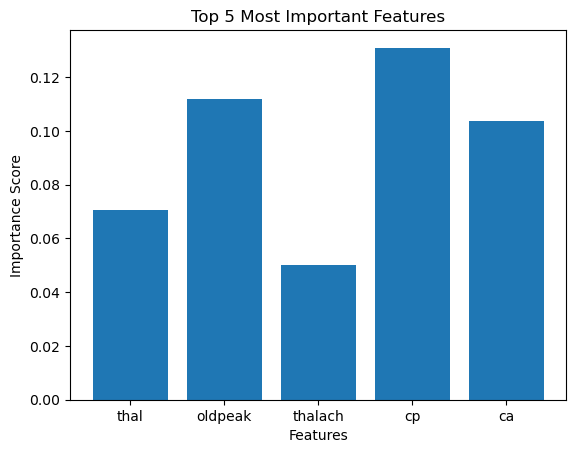

In [6]:
# Q5. Feature importance
feature_importances = rf_classifier.feature_importances_
top_5_features = X.columns[feature_importances.argsort()[-5:]]

# Visualize feature importance
import matplotlib.pyplot as plt

plt.bar(top_5_features, feature_importances[-5:])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 5 Most Important Features")
plt.show()

In [7]:
# Q6. Hyperparameter Tuning (Grid Search example)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [8]:
# Q7. Report best hyperparameters and performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", tuned_accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.8487264673311185
Tuned Model Accuracy: 0.8681318681318682


In [9]:
# Q8. Interpretability (limitations apply)
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
from sklearn.inspection import plot_partial_dependence

feature1 = top_5_features[0]
feature2 = top_5_features[1]

partial_dependence_plot(best_model, X_test, [feature1, feature2])
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/opt/conda/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [10]:
import warnings
warnings.filterwarnings("ignore")

Accuracy: 0.8132, Precision: 0.8367, Recall: 0.8200, F1 Score: 0.8283
Top 5 Important Features:
   Feature  Importance
11      ca    0.130905
2     chol    0.126912
7      fbs    0.114802
9    exang    0.111722
12    thal    0.103657


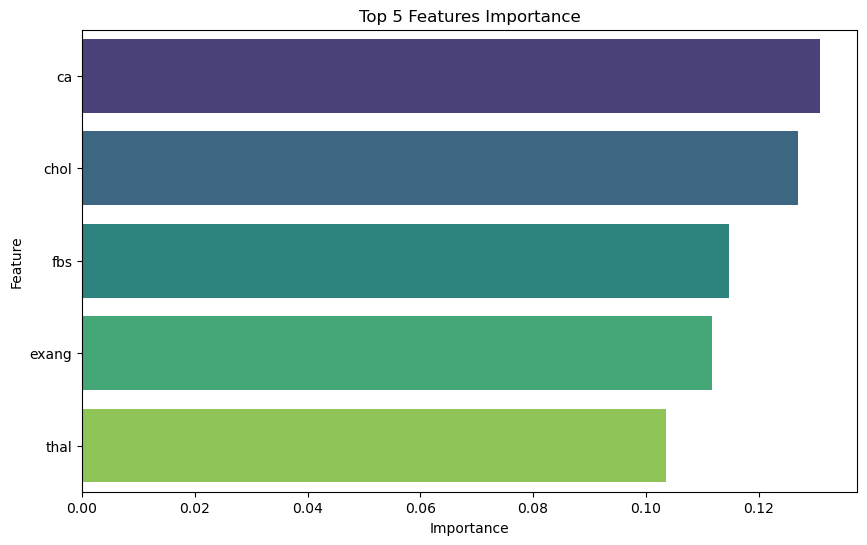

Best Hyperparameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Best Cross-Validated Accuracy: nan
Default Model Accuracy: 0.8132
Tuned Model Accuracy: 0.8462


ValueError: X has 2 features, but RandomForestClassifier is expecting 13 features as input.

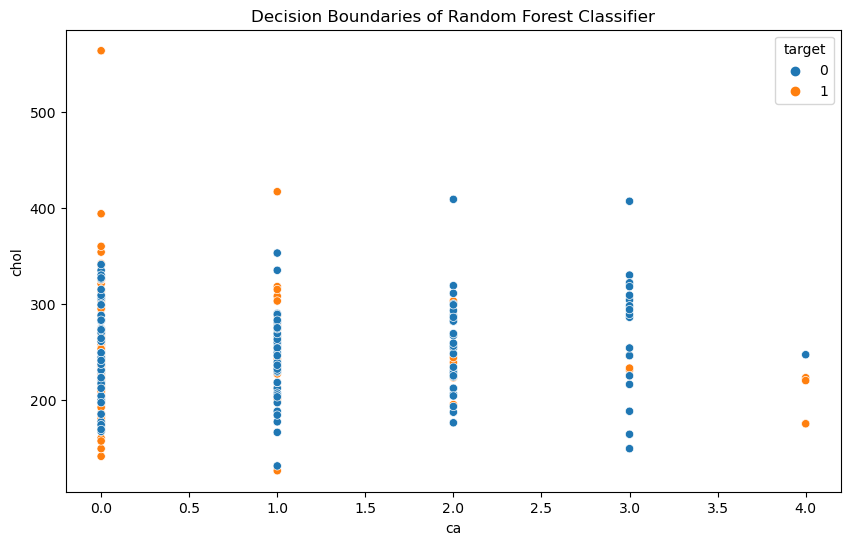

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
import numpy as np

url = "/home/jovyan/work/dataset.csv" 
df = pd.read_csv(url)

# Q1. Preprocess the dataset
# Assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Handling missing values
df = df.dropna()

# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Q2. Split the dataset into training and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Q3. Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Q4. Evaluate the performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Q5. Feature Importance
feature_names = numerical_features + categorical_features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_classifier.feature_importances_})
top_features = feature_importance_df.nlargest(5, 'Importance')
print("Top 5 Important Features:")
print(top_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Features Importance')
plt.show()


# Q6. Hyperparameter tuning
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [5, 10, 15],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Q7. Report best hyperparameters and performance metrics
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_accuracy:.4f}")

# Compare with default model
default_model = rf_classifier.score(X_test, y_test)
tuned_model = grid_search.best_estimator_.score(X_test, y_test)
print(f"Default Model Accuracy: {default_model:.4f}")
print(f"Tuned Model Accuracy: {tuned_model:.4f}")

# Q8. Interpret the model by analyzing decision boundaries
# Assuming two most important features are used for plotting
important_features = top_features['Feature'].tolist()[:2]
X_plot = X_test[important_features].to_numpy()
y_plot = y_test.to_numpy()

# Plot decision boundaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=important_features[0], y=important_features[1], hue='target', data=df)
plt.title('Decision Boundaries of Random Forest Classifier')
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])

# Decision boundaries for two classes
tree_rules = export_text(rf_classifier.estimators_[0], feature_names=feature_names)
boundary_x, boundary_y = np.meshgrid(np.linspace(X_plot[:, 0].min(), X_plot[:, 0].max(), 100),
                                     np.linspace(X_plot[:, 1].min(), X_plot[:, 1].max(), 100))
boundary_data = np.c_[boundary_x.ravel(), boundary_y.ravel()]
boundary_probs = rf_classifier.predict_proba(boundary_data)[:, 1].reshape(boundary_x.shape)
plt.contour(boundary_x, boundary_y, boundary_probs, levels=[0.5], colors='black', linestyles='dashed')
plt.show()